In [1]:
import copy
import datetime
import matplotlib.pyplot as plt
import multiprocessing
import numpy as np
import os
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
from gendis.genetic import GeneticExtractor

/home/samir/miniconda3/envs/gendis/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('data/sin_synth/SIN_NORMAL_500_v3.csv')

In [4]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
0,-1.037213,0.122516,2.222373,1.768441,0.535370,0.817126,0.887564,0.177032,-0.637317,0.170172,...,3.307236,3.567945,3.041047,2.650529,2.192301,NaN,NaN,NaN,0.424577,0.0
1,1.335390,1.592021,0.105620,-0.569830,-1.936606,-2.159233,0.055004,-0.304618,-0.428491,-2.114047,...,-3.127266,-2.525985,-2.156904,-1.265969,-1.088417,NaN,NaN,NaN,0.792029,0.0
2,0.576089,-0.614140,-1.955747,-0.383681,0.071087,0.605902,1.198012,1.982545,-0.035235,-1.106450,...,-2.174720,-2.015002,-1.678418,0.244067,1.764900,NaN,NaN,NaN,0.336560,0.0


In [5]:
df[df.index==287]

,0,1,2,3,4,5,6,7,8,9,...,145,146,147,148,149,sin_x0,sin_x1,sin_y,error,label
287,-1.090005,-0.184453,0.917582,-0.38895,0.05966,0.723831,-1.493166,-0.452953,-0.850827,0.470209,...,-1.065982,-0.332387,0.008585,-0.921294,-0.172631,103.0,140.0,-2.460618,0.923501,1.0


In [6]:
df.error.describe()

count    500.000000
mean       0.692590
std        0.222238
min        0.247278
25%        0.485802
50%        0.780755
75%        0.903432
max        0.999553
Name: error, dtype: float64

In [7]:
df.label.value_counts()

1.0    250
0.0    250
Name: label, dtype: int64

In [8]:
len(df)

500

In [9]:
df = df.drop(columns='error')
X = df.drop(columns=['sin_x0', 'sin_x1', 'sin_y', 'label'])
y = df['label']

In [10]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.8, random_state=0)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y))

X_train, y_train = X.iloc[train_index], y.iloc[train_index]
X_test, y_test = X.iloc[test_index], y.iloc[test_index]

In [11]:
from gendis.fitness import logloss_fitness

args = {
    "dist_function": "dtw",
    "apply_differencing": True,
     "fitness": logloss_fitness,
    "population_size": 200,
    "max_shaps": 10,
    "iterations": 100,  
    "mutation_prob": 0.3, 
    "crossover_prob": 0.3, 
    "wait": 20, 
    "n_jobs": multiprocessing.cpu_count()-3,
    "verbose": True,
} 

gendis = GeneticExtractor(**args)

In [12]:
gendis.__dict__

{'dist_function': <function gendis.shapelets_distances.dtw(timeseries_matrix, shaps, distances)>,
 'dist_func_returns': True,
 'fitness': <function gendis.fitness.logloss_fitness(D, y, verbose=False)>,
 'apply_differencing': True,
 'population_size': 200,
 'iterations': 100,
 'verbose': True,
 'mutation_prob': 0.3,
 'crossover_prob': 0.3,
 'plot': None,
 'wait': 20,
 'n_jobs': 13,
 'normed': False,
 'min_len': 0,
 'max_len': None,
 'max_shaps': 10,
 'init_ops': [<function gendis.operators.random_shapelet(X, n_shapelets, min_len_series, max_len, min_len=4)>,
  <function gendis.operators.kmeans(X, n_shapelets, min_len_series, max_len, n_draw=None, min_len=4)>],
 'cx_ops': [<function gendis.operators.merge_crossover(ind1, ind2, p=0.25)>,
  <function gendis.operators.point_crossover(ind1, ind2)>,
  <function gendis.operators.shap_point_crossover(ind1, ind2, p=0.25)>],
 'mut_ops': [<function gendis.operators.add_shapelet(shapelets, toolbox)>,
  <function gendis.operators.remove_shapelet(sha

In [13]:
%%time
gendis.fit(X_train, y_train)

it		avg		std		max		time
1		-0.1517		0.153		-0.004944	3.3889
2		-0.0445		0.061		-0.004944	3.692
3		-0.018		0.018		-0.004944	3.8339
4		-0.0108		0.008		-0.004944	3.7084
5		-0.0079		0.003		-0.00387	3.867
6		-0.0062		0.002		-0.003722	3.9246
7		-0.0052		0.001		-0.0031	3.832
8		-0.0045		0.001		-0.002839	3.8021
9		-0.0039		0.001		-0.002363	3.7357
10		-0.0033		0.001		-0.002079	3.7836
11		-0.0029		0.0		-0.001911	4.6878
12		-0.0026		0.0		-0.001911	5.0018
13		-0.0025		0.0		-0.001864	5.4514
14		-0.0023		0.0		-0.001539	6.0238
15		-0.0021		0.0		-0.001539	6.2214
16		-0.0019		0.0		-0.001487	5.958
17		-0.0017		0.0		-0.001487	5.1984
18		-0.0016		0.0		-0.001381	5.6109
19		-0.0015		0.0		-0.001331	5.7877
20		-0.0015		0.0		-0.001331	5.8618
21		-0.0014		0.0		-0.001329	6.339
22		-0.0014		0.0		-0.001237	6.7438
23		-0.0014		0.0		-0.001226	7.2431
24		-0.0013		0.0		-0.001192	6.8539
25		-0.0013		0.0		-0.001137	7.2137
26		-0.0012		0.0		-0.00107	8.4105
27		-0.0012		0.0		-0.001067	8.7907
28		-0.0012		0.0		-0.001061	8.

In [14]:
%%time
distances_train = gendis.transform(X_train)
distances_test = gendis.transform(X_test)

CPU times: user 5.01 s, sys: 38 µs, total: 5.01 s
Wall time: 5.01 s


In [15]:
dists = pd.DataFrame(distances_train)
dists.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0.761860,0.799274,0.432663,0.940607,0.842112,0.721042,0.839276,0.659437,0.433104,0.364533,...,0.667848,0.760525,1.075654,0.850159,0.720769,0.668301,0.721042,0.788761,0.325734,6.697714
1,0.741958,0.789194,0.549070,0.896543,0.816025,0.739748,0.804644,0.653723,0.549549,0.572091,...,0.640428,0.785329,1.037705,0.770252,0.739338,0.641009,0.739748,0.781745,0.251484,7.634354
2,4.585838,5.668760,0.235691,5.729092,5.687637,5.664457,5.683387,3.188609,0.236037,0.502513,...,4.440761,5.653277,5.736466,4.282332,5.664953,4.440926,5.664457,5.666287,5.252441,6.923642
3,4.527786,5.106698,0.455902,5.214225,5.160810,5.114412,5.121735,2.969694,0.455564,0.801493,...,4.281133,5.130344,5.279769,4.260928,5.115623,4.281531,5.114412,5.101358,5.217985,6.435840
4,0.761860,0.799274,0.432663,0.940607,0.842112,0.721042,0.839276,0.659437,0.433104,0.364533,...,0.667848,0.760525,1.075654,0.850159,0.720769,0.668301,0.721042,0.788761,0.579877,6.898220


In [16]:
dists["label"] = y_train.values
dists["label"].value_counts()
dists.index = X_train.index
dists[['sin_x0', 'sin_x1', 'sin_y', 'label']] = df[['sin_x0', 'sin_x1', 'sin_y', 'label']]

In [17]:
def test_shapelet_separation(shap, shap_id):
    axs_multiplier = 0.75
    f, axs = plt.subplots(1, 3, figsize=(3*axs_multiplier*6.4, axs_multiplier*4.8))
    print(f"Testing separation for shapelet {shap_id}")
    
    # Shapelet plot
    axs[0].plot(shap)
    
    # Distance histograms plot
    bins = np.linspace(0, 120, 20)
    axs[1].hist(dists.loc[dists['label']==0, shap_id], alpha=0.5, label='sin=false')
    axs[1].hist(dists.loc[dists['label']==1, shap_id], alpha=0.5, label='sin=true')
    axs[1].legend(loc='upper right')
    
    # Distance versus sin_y
    dists.plot.scatter(x='sin_y', y=shap_id, c='DarkBlue', ax=axs[2])
    
    
    # Accuracy using the shapelet as feature
    single_shapelet_train = distances_train[:, shap_id].reshape(-1, 1)
    single_shapelet_test = distances_test[:, shap_id].reshape(-1, 1)
    
    lr = LogisticRegression()
    lr.fit(single_shapelet_train, y_train)
    y_pred = lr.predict(single_shapelet_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'Accuracy = {acc}')
    print(confusion_matrix(y_test, y_pred))
    
    plt.show()

Testing separation for shapelet 0
Accuracy = 1.0
[[200   0]
 [  0 200]]


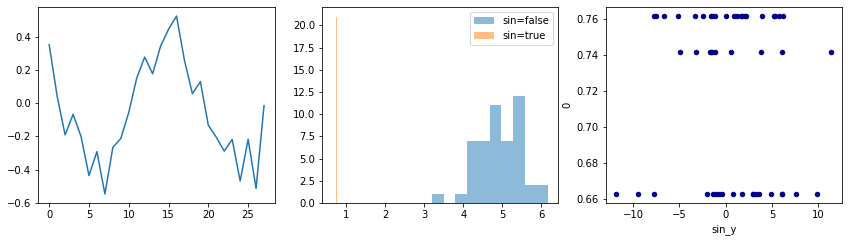

Testing separation for shapelet 1
Accuracy = 1.0
[[200   0]
 [  0 200]]


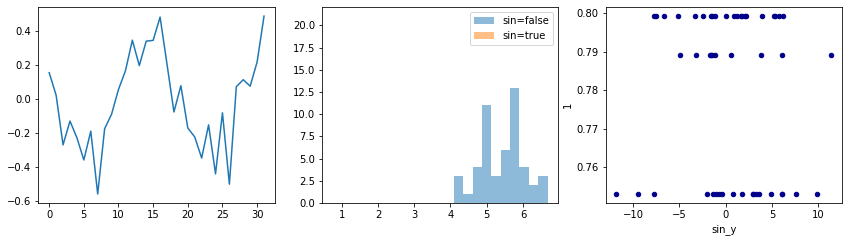

Testing separation for shapelet 2
Accuracy = 0.8525
[[141  59]
 [  0 200]]


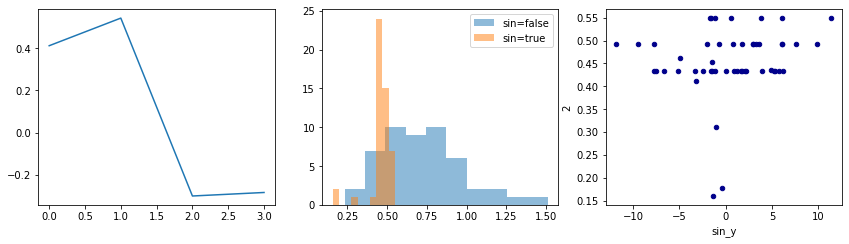

Testing separation for shapelet 3
Accuracy = 1.0
[[200   0]
 [  0 200]]


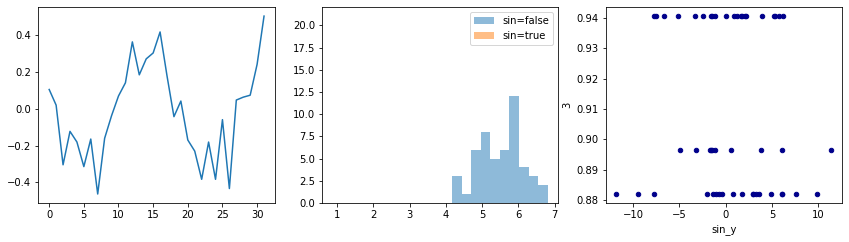

Testing separation for shapelet 4
Accuracy = 1.0
[[200   0]
 [  0 200]]


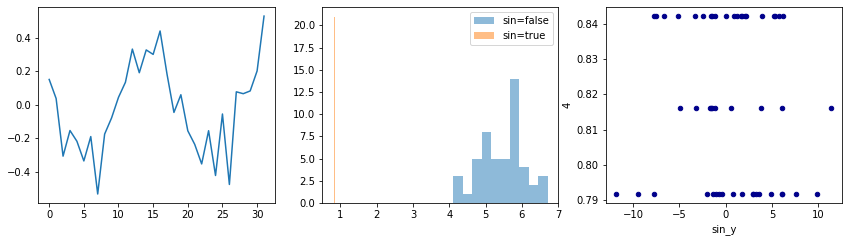

Testing separation for shapelet 5
Accuracy = 1.0
[[200   0]
 [  0 200]]


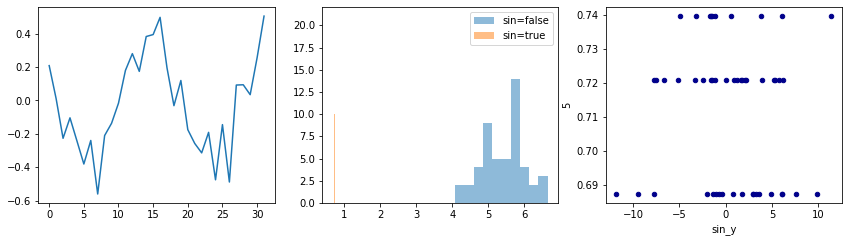

Testing separation for shapelet 6
Accuracy = 1.0
[[200   0]
 [  0 200]]


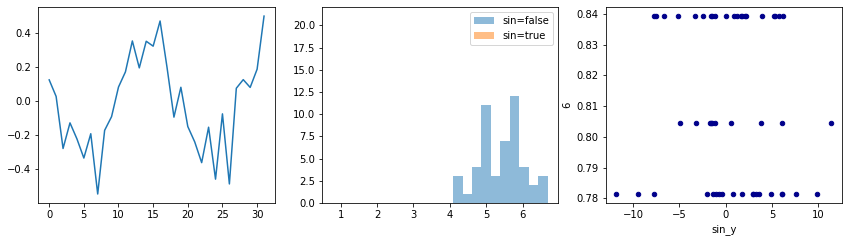

Testing separation for shapelet 7
Accuracy = 0.9975
[[199   1]
 [  0 200]]


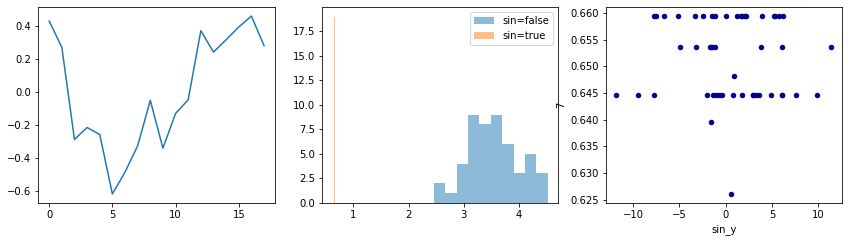

Testing separation for shapelet 8
Accuracy = 0.8525
[[141  59]
 [  0 200]]


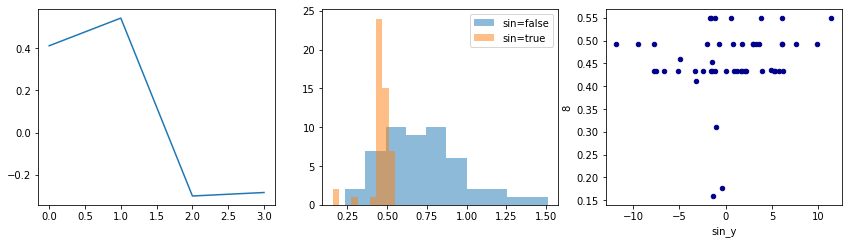

Testing separation for shapelet 9
Accuracy = 0.775
[[163  37]
 [ 53 147]]


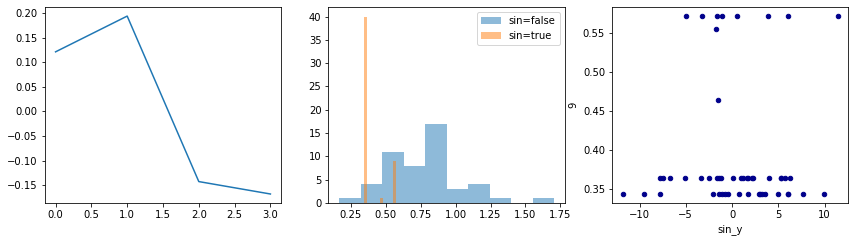

Testing separation for shapelet 10
Accuracy = 0.9975
[[199   1]
 [  0 200]]


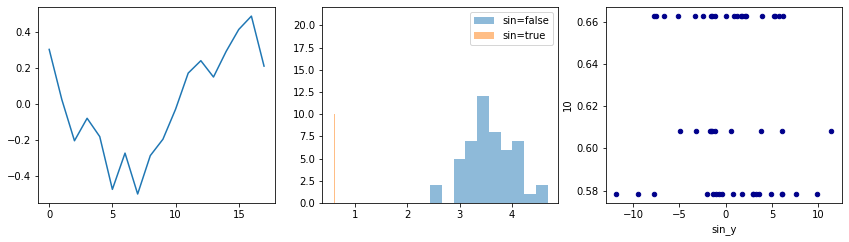

Testing separation for shapelet 11
Accuracy = 0.995
[[198   2]
 [  0 200]]


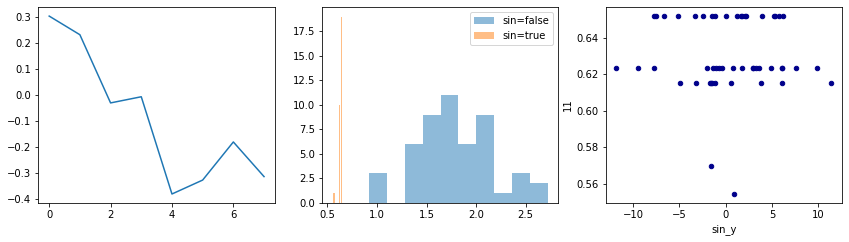

Testing separation for shapelet 12
Accuracy = 1.0
[[200   0]
 [  0 200]]


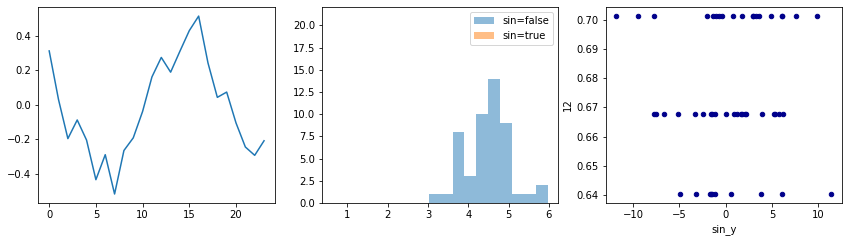

Testing separation for shapelet 13
Accuracy = 1.0
[[200   0]
 [  0 200]]


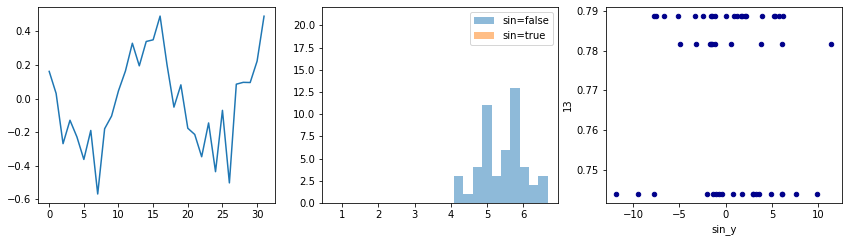

Testing separation for shapelet 14
Accuracy = 1.0
[[200   0]
 [  0 200]]


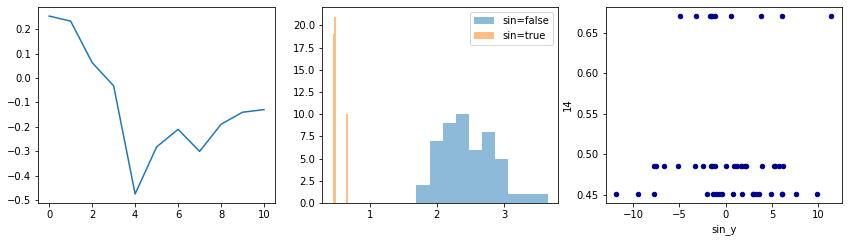

Testing separation for shapelet 15
Accuracy = 1.0
[[200   0]
 [  0 200]]


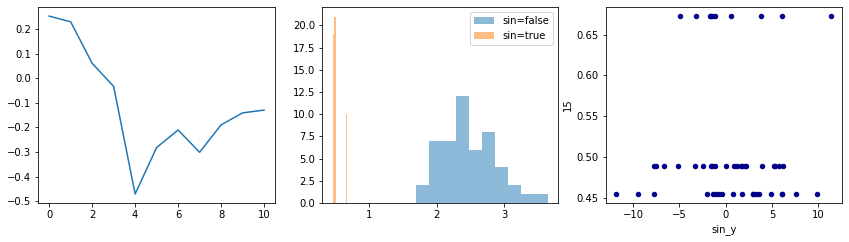

Testing separation for shapelet 16
Accuracy = 1.0
[[200   0]
 [  0 200]]


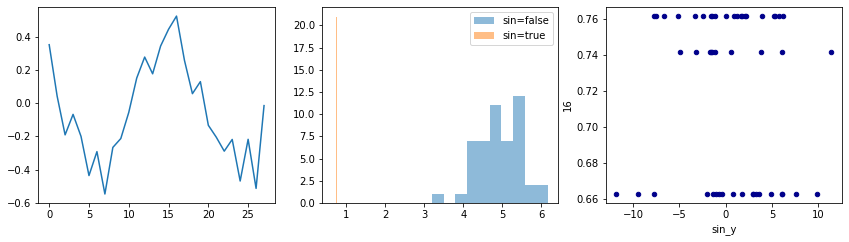

Testing separation for shapelet 17
Accuracy = 0.8525
[[141  59]
 [  0 200]]


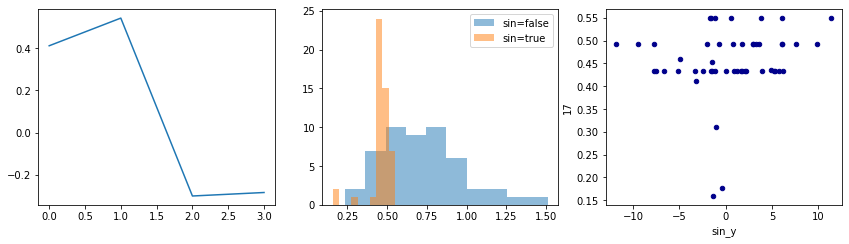

Testing separation for shapelet 18
Accuracy = 0.9975
[[199   1]
 [  0 200]]


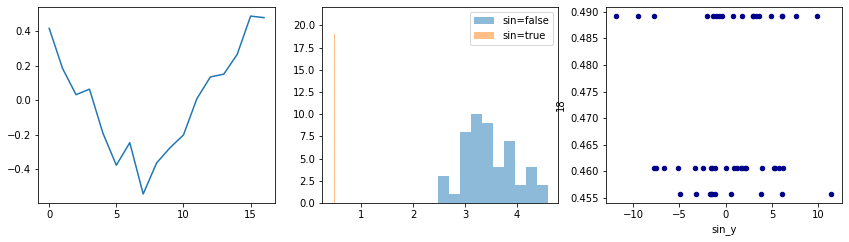

Testing separation for shapelet 19
Accuracy = 1.0
[[200   0]
 [  0 200]]


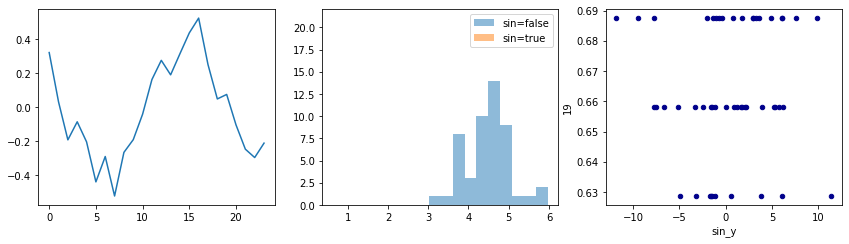

Testing separation for shapelet 20
Accuracy = 1.0
[[200   0]
 [  0 200]]


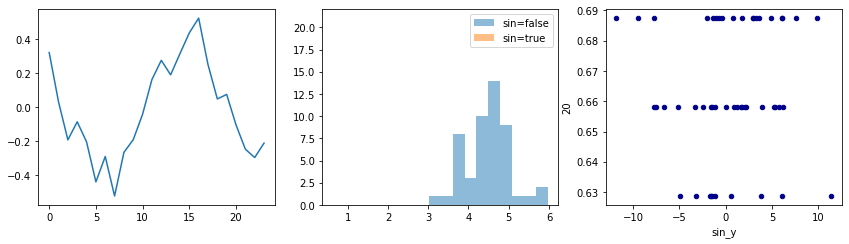

Testing separation for shapelet 21
Accuracy = 0.695
[[119  81]
 [ 41 159]]


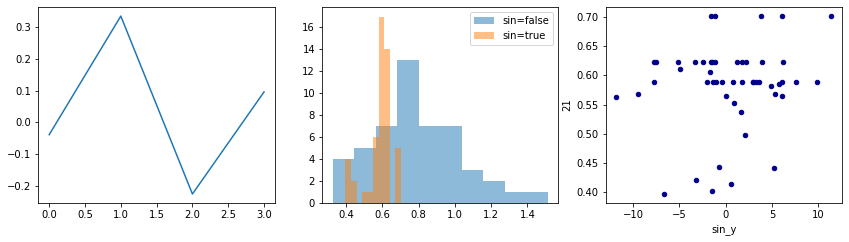

Testing separation for shapelet 22
Accuracy = 1.0
[[200   0]
 [  0 200]]


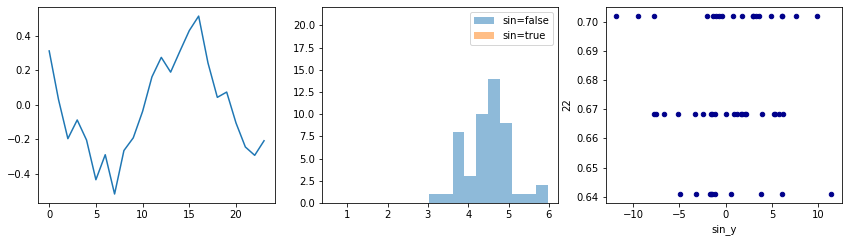

Testing separation for shapelet 23
Accuracy = 0.9975
[[199   1]
 [  0 200]]


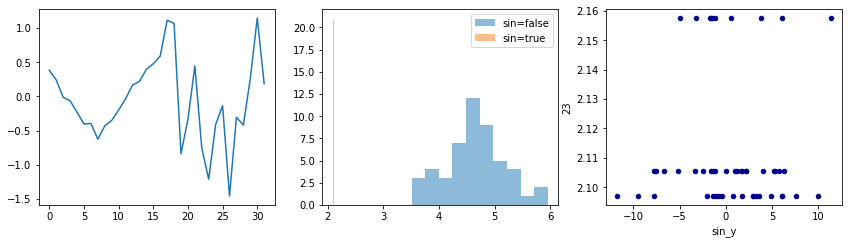

Testing separation for shapelet 24
Accuracy = 1.0
[[200   0]
 [  0 200]]


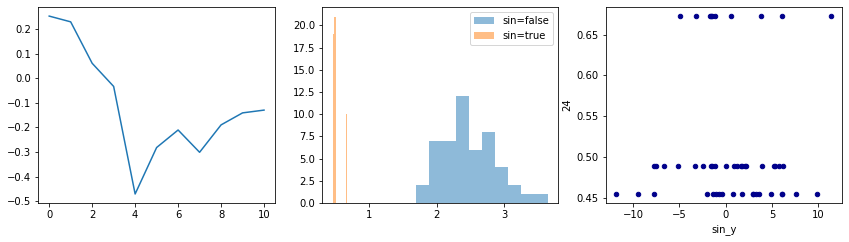

Testing separation for shapelet 25
Accuracy = 0.8525
[[141  59]
 [  0 200]]


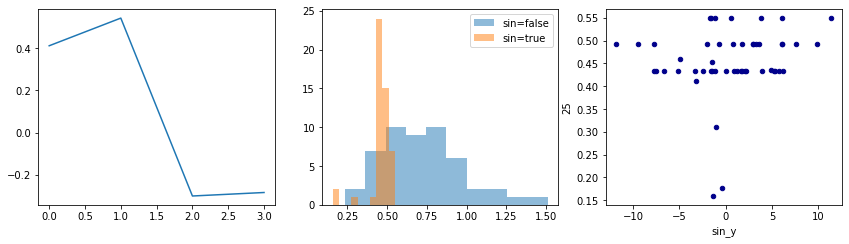

Testing separation for shapelet 26
Accuracy = 1.0
[[200   0]
 [  0 200]]


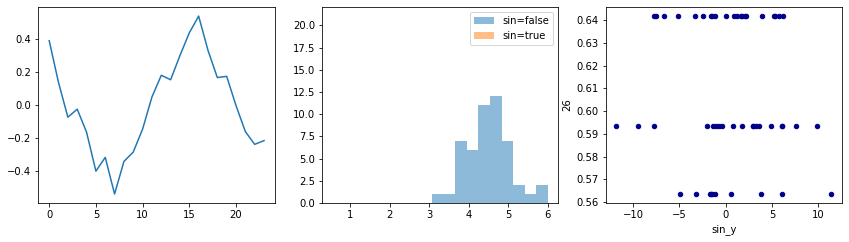

Testing separation for shapelet 27
Accuracy = 1.0
[[200   0]
 [  0 200]]


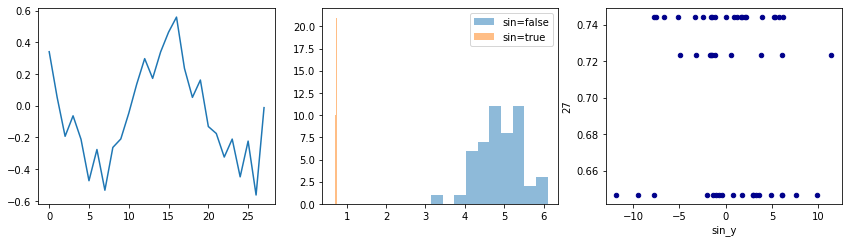

Testing separation for shapelet 28
Accuracy = 1.0
[[200   0]
 [  0 200]]


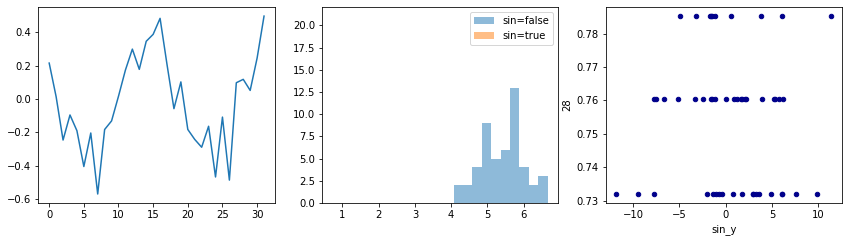

Testing separation for shapelet 29
Accuracy = 1.0
[[200   0]
 [  0 200]]


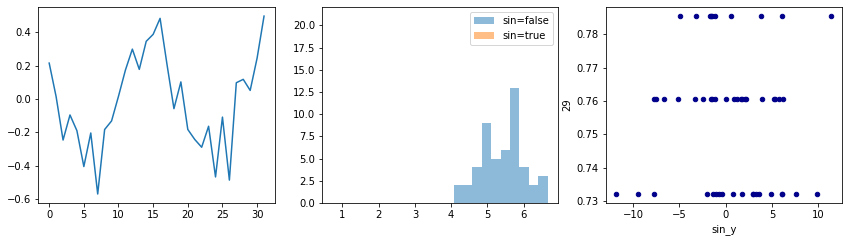

Testing separation for shapelet 30
Accuracy = 0.8525
[[141  59]
 [  0 200]]


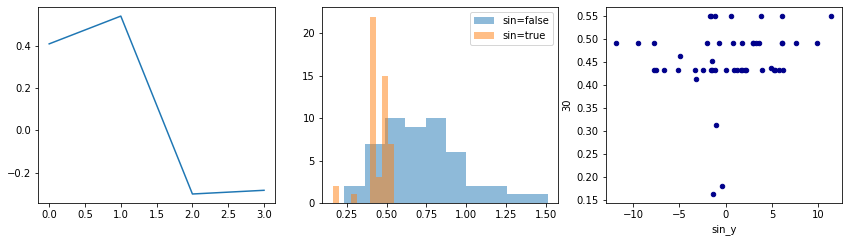

Testing separation for shapelet 31
Accuracy = 1.0
[[200   0]
 [  0 200]]


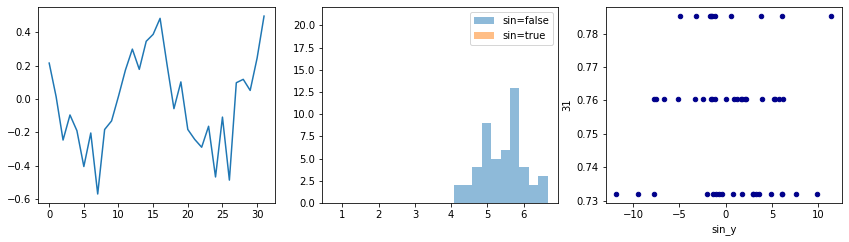

Testing separation for shapelet 32
Accuracy = 1.0
[[200   0]
 [  0 200]]


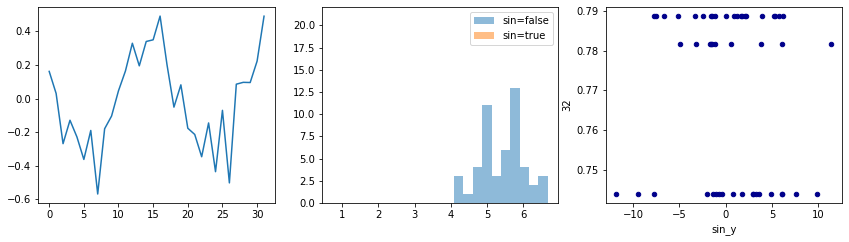

Testing separation for shapelet 33
Accuracy = 0.6175
[[102  98]
 [ 55 145]]


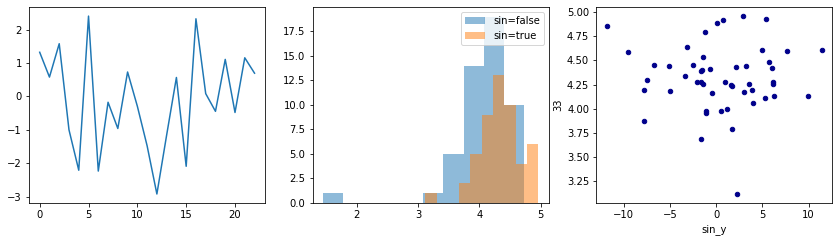

Testing separation for shapelet 34
Accuracy = 1.0
[[200   0]
 [  0 200]]


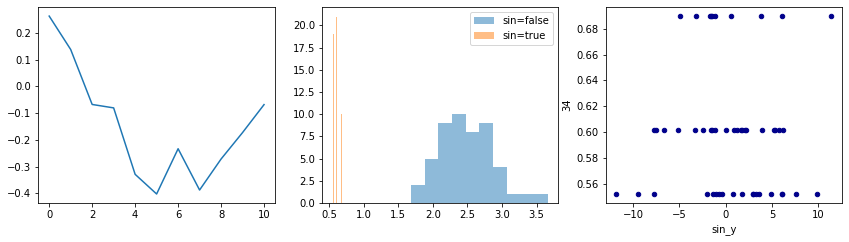

Testing separation for shapelet 35
Accuracy = 1.0
[[200   0]
 [  0 200]]


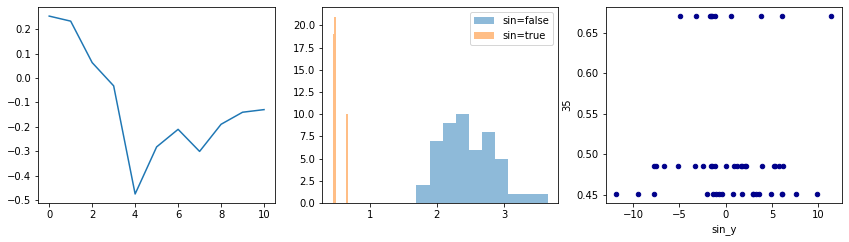

Testing separation for shapelet 36
Accuracy = 1.0
[[200   0]
 [  0 200]]


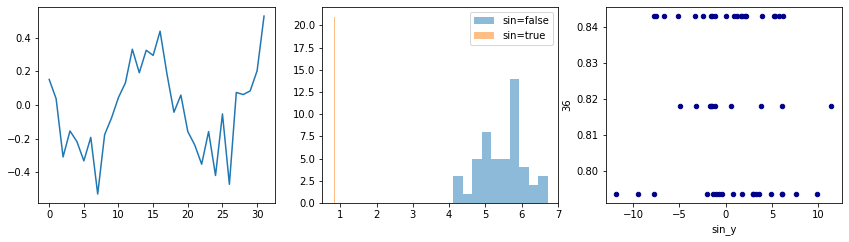

Testing separation for shapelet 37
Accuracy = 1.0
[[200   0]
 [  0 200]]


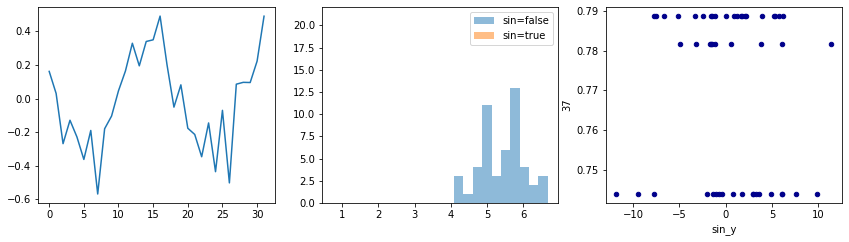

Testing separation for shapelet 38
Accuracy = 1.0
[[200   0]
 [  0 200]]


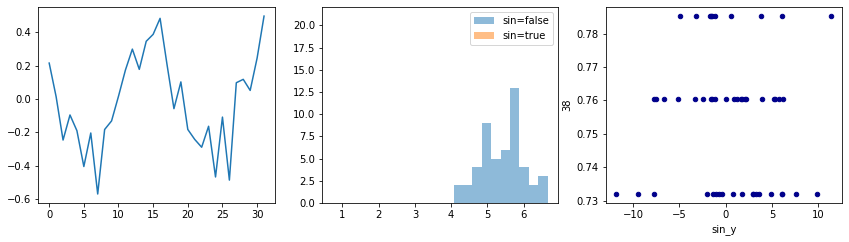

Testing separation for shapelet 39
Accuracy = 0.8525
[[141  59]
 [  0 200]]


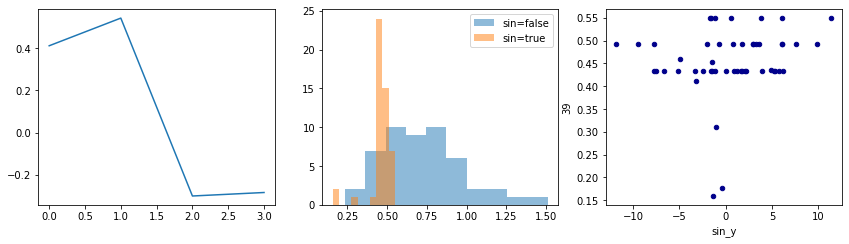

Testing separation for shapelet 40
Accuracy = 0.8525
[[141  59]
 [  0 200]]


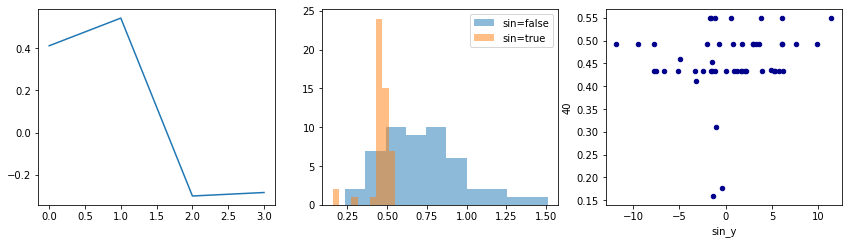

Testing separation for shapelet 41
Accuracy = 1.0
[[200   0]
 [  0 200]]


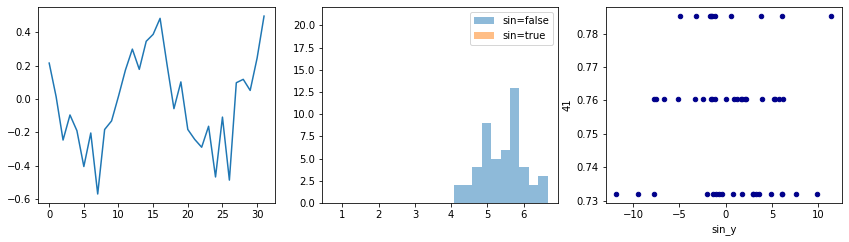

Testing separation for shapelet 42
Accuracy = 1.0
[[200   0]
 [  0 200]]


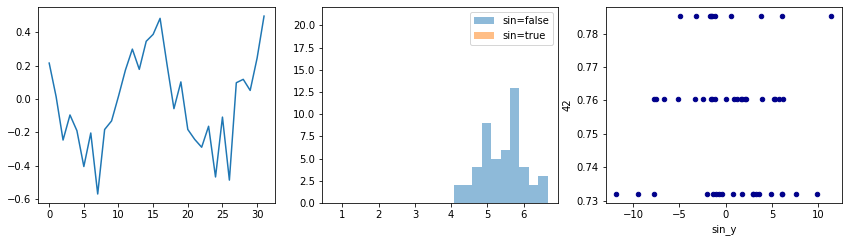

Testing separation for shapelet 43
Accuracy = 1.0
[[200   0]
 [  0 200]]


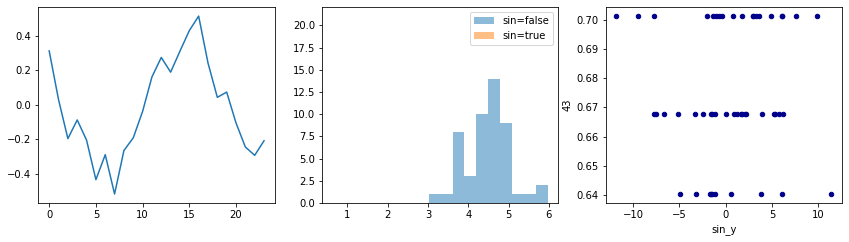

Testing separation for shapelet 44
Accuracy = 1.0
[[200   0]
 [  0 200]]


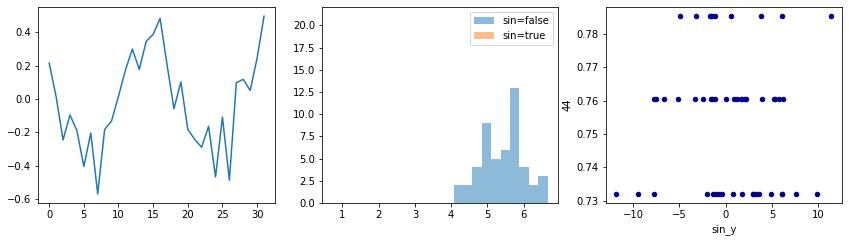

Testing separation for shapelet 45
Accuracy = 1.0
[[200   0]
 [  0 200]]


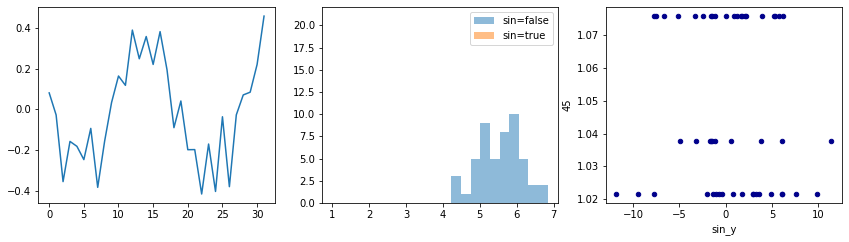

Testing separation for shapelet 46
Accuracy = 1.0
[[200   0]
 [  0 200]]


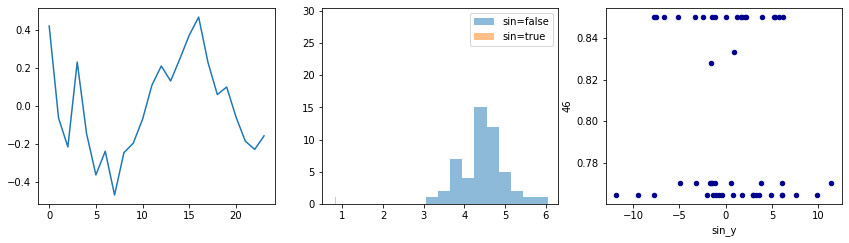

Testing separation for shapelet 47
Accuracy = 1.0
[[200   0]
 [  0 200]]


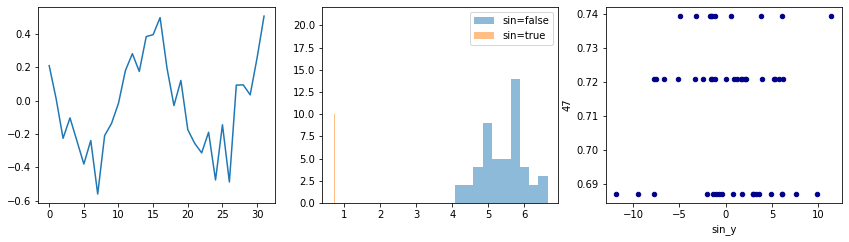

Testing separation for shapelet 48
Accuracy = 1.0
[[200   0]
 [  0 200]]


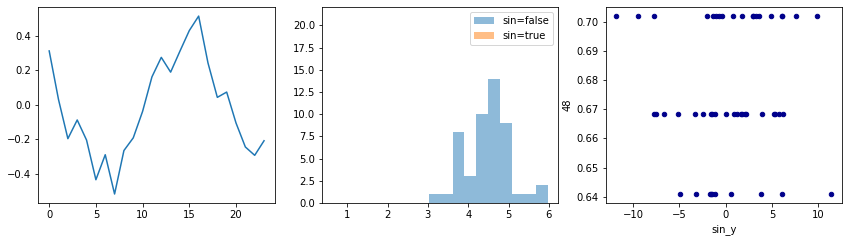

Testing separation for shapelet 49
Accuracy = 1.0
[[200   0]
 [  0 200]]


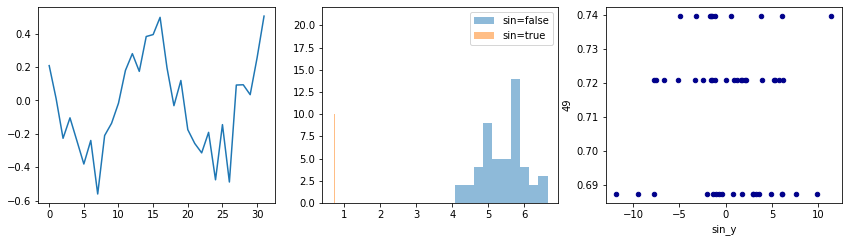

Testing separation for shapelet 50
Accuracy = 1.0
[[200   0]
 [  0 200]]


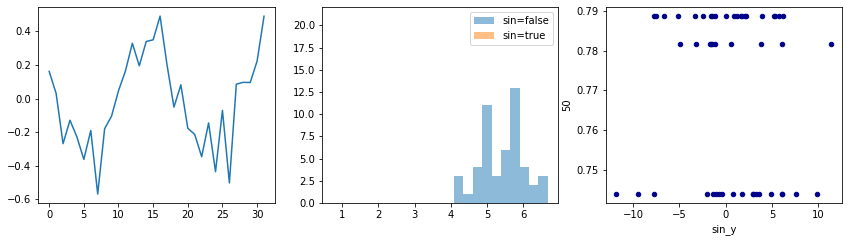

Testing separation for shapelet 51
Accuracy = 1.0
[[200   0]
 [  0 200]]


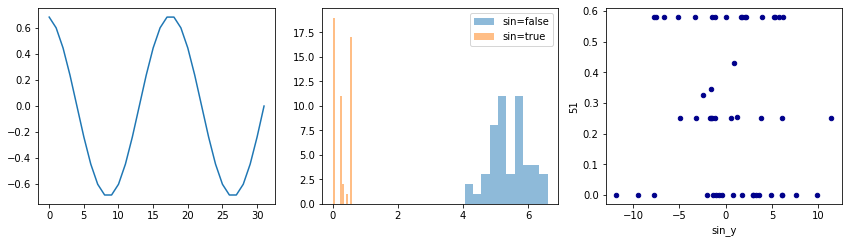

Testing separation for shapelet 52
Accuracy = 0.585
[[110  90]
 [ 76 124]]


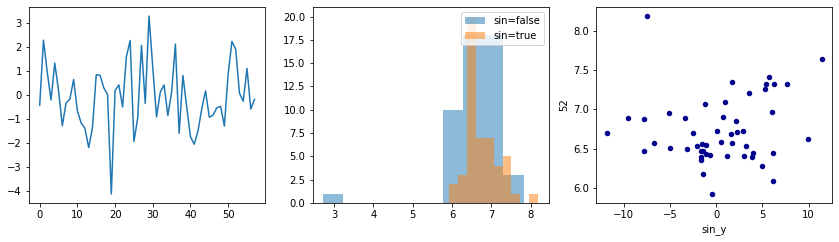

In [18]:
for i, shap in enumerate(gendis.best["shapelets"], start=0):
    test_shapelet_separation(shap, i)

In [19]:
X_train.values.shape[0]

100

In [20]:
from dtaidistance.preprocessing import differencing
def plot_random_series_diff_helper(df):
    axs_multiplier = 0.75
    f, axs = plt.subplots(1, 2, figsize=(2*axs_multiplier*6.4, axs_multiplier*4.8), sharey=True)
    
    ts = df.sample(1).values[0]
    axs[0].plot(ts)

    ts_diff = np.apply_along_axis(lambda s: differencing(s, smooth=None), 0, ts)
    axs[1].plot(ts_diff)
    plt.show()
    

In [ ]:
plot_random_series_diff_helper(X_train)

<AxesSubplot:>

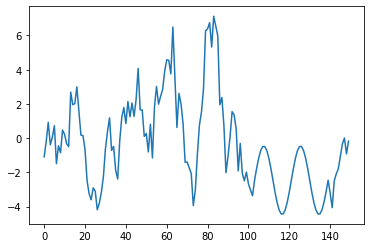

In [21]:
test_series = X_train.loc[287]
test_series.plot()

In [29]:
help(differencing)

Help on function differencing in module dtaidistance.preprocessing:

differencing(series, smooth=None)
    Differencing series.
    
    :param series: Time series (must be numpy compatible)
    :param smooth: Smooth the series by removing the `smooth` percentage ([0-1])
        of highest frequency.
    :return: Differenced Numpy array



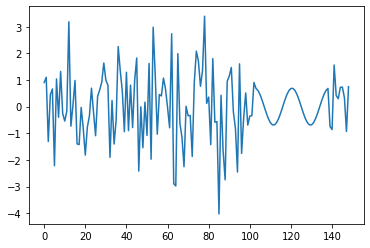

In [33]:
ts_diff = differencing(test_series.values, smooth=None)
plt.plot(ts_diff)

### Persistence of results

In [ ]:
X_train.loc[287].plot()

In [ ]:
ts = datetime.datetime.now().strftime('%Y%m%d%H%M%S')
folder = './test_sin_results/'
os.makedirs(folder, exist_ok=True)

dists.to_csv(f'{folder}/test_sin_500_fixed_nonoise_distmatrix_{ts}.csv', header=False, index=False)


with open(f'{folder}/gendis_{ts}.pickle', 'wb') as file_handler:
    pickle.dump(gendis, file_handler, protocol=pickle.HIGHEST_PROTOCOL)